In [1]:
using Roots
using Plots

In [2]:
f(x) = x^5 - 1;

In [3]:
Df(x) = 5*x^4;

In [4]:
solutions = [exp(2/5*pi*im*i) for i in 0:4]

5-element Vector{ComplexF64}:
                 1.0 + 0.0im
 0.30901699437494745 + 0.9510565162951535im
 -0.8090169943749473 + 0.5877852522924732im
 -0.8090169943749475 - 0.587785252292473im
 0.30901699437494723 - 0.9510565162951536im

In [5]:
x₀ = im

im

In [6]:
sol = find_zero((f, Df), x₀, Roots.Newton())

0.30901699437494745 + 0.9510565162951535im

In [7]:
which_root(x) = isnan(x) ? 0 : argmin(abs.(solutions .- x))

which_root (generic function with 1 method)

In [24]:
function map_to_root(point)
    x₀ = point[1] + point[2]*im
    sol = NaN
    try
        sol = find_zero((f, Df), x₀, Roots.Newton())
    catch e
        #println("Non-convergence for ", point)
    end
    return which_root(sol)
end

map_to_root (generic function with 1 method)

In [9]:
map_to_root((0,1))

2

In [10]:
map_to_root((0,0))

0

In [11]:
cgrid(from, to, step) = Iterators.product(from:step:to,from:step:to) |> collect;

In [28]:
vec = collect(-b1:0.5:1)

5-element Vector{Float64}:
 -1.0
 -0.5
  0.0
  0.5
  1.0

In [25]:
cg = cgrid(-1,1,.5)

5×5 Matrix{Tuple{Float64, Float64}}:
 (-1.0, -1.0)  (-1.0, -0.5)  (-1.0, 0.0)  (-1.0, 0.5)  (-1.0, 1.0)
 (-0.5, -1.0)  (-0.5, -0.5)  (-0.5, 0.0)  (-0.5, 0.5)  (-0.5, 1.0)
 (0.0, -1.0)   (0.0, -0.5)   (0.0, 0.0)   (0.0, 0.5)   (0.0, 1.0)
 (0.5, -1.0)   (0.5, -0.5)   (0.5, 0.0)   (0.5, 0.5)   (0.5, 1.0)
 (1.0, -1.0)   (1.0, -0.5)   (1.0, 0.0)   (1.0, 0.5)   (1.0, 1.0)

In [26]:
map_to_root.(cg)

5×5 Matrix{Int64}:
 4  4  1  3  3
 5  4  1  3  2
 5  1  0  1  2
 5  4  1  3  2
 5  2  1  5  2

In [17]:
length(cgrid(-1,1,.002))

1002001

In [13]:
@time begin
    fractal = map_to_root.(cgrid(-1,1,.002))
end;

  2.904943 seconds (6.93 M allocations: 309.890 MiB, 1.44% gc time, 0.75% compilation time)


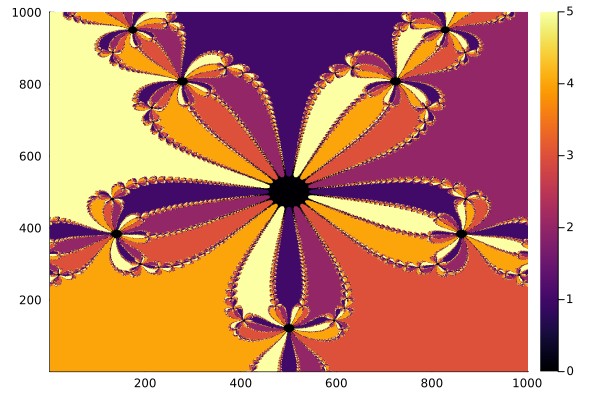

In [14]:
heatmap(fractal)#, color=palette(:viridis))

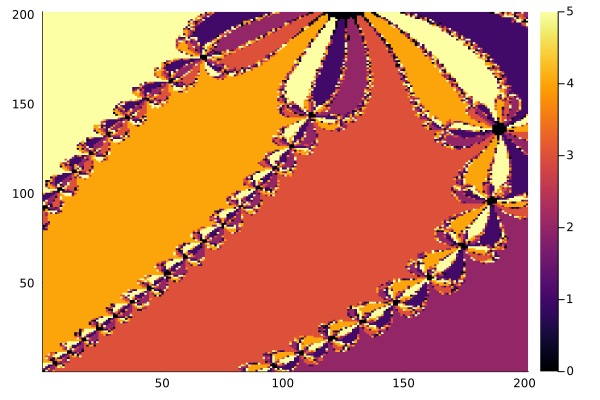

In [15]:
heatmap(fractal[600:800,600:800])#, color=palette(:viridis))